# Dalip data analysis

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
so_df = pd.read_csv('data/stackoverflow_1_50000.csv')

In [5]:
so_df.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,RowNum
0,4,1,7.0,NaN,2008-07-31 21:42:52,117,8739.0,"<p>I'm new to C#, and I want to use a track-ba...",8.0,NaN,...,2012-02-26 13:46:05,2012-03-06 08:07:53,When setting a form's opacity should I use a d...,<c#><winforms><forms><opacity>,12.0,16.0,13.0,NaN,NaN,1
1,6,1,31.0,NaN,2008-07-31 22:08:08,33,2761.0,<p>I have an absolutely positioned <code>div</...,9.0,NaN,...,2012-02-26 13:47:20,2012-02-26 13:47:20,Why doesn't the percentage width child in abso...,<html><css><css3><internet-explorer-7>,5.0,5.0,2.0,NaN,NaN,2
2,7,2,NaN,4.0,2008-07-31 22:17:57,111,NaN,<p>An explicit cast to double isn't necessary....,9.0,NaN,...,2010-02-02 19:38:14,2010-02-02 19:38:14,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3
3,8,1,162.0,NaN,2008-07-31 23:33:19,17,1405.0,<p>Are there any conversion tools for porting ...,9.0,NaN,...,2012-02-26 13:49:17,2012-02-26 13:49:17,Are there any conversion tools for porting Vis...,<c#><j#><visualj#>,3.0,0.0,1.0,NaN,NaN,4
4,9,1,1404.0,NaN,2008-07-31 23:40:59,272,74315.0,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,...,2012-02-26 13:50:29,2012-02-26 13:50:29,How do I calculate someone's age in C#?,<c#><.net><math><datetime>,31.0,5.0,132.0,NaN,2011-08-16 19:40:43,5


In [15]:
so_df['PostTypeId'].value_counts()

2    41100
1     8900
Name: PostTypeId, dtype: int64

In [13]:
so_df['PostTypeId'].value_counts(normalize=True)

2    0.822
1    0.178
Name: PostTypeId, dtype: float64

In [33]:
so_df['ParentId'].describe()

count     41100.000000
mean      34584.406886
std       22898.676696
min           4.000000
25%       16074.000000
50%       34396.500000
75%       52598.000000
max      654275.000000
Name: ParentId, dtype: float64

In [38]:
so_df['ParentId'].quantile(0.95)

66164.04999999999

<AxesSubplot:>

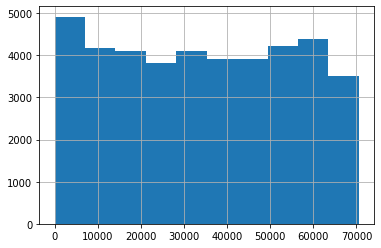

In [42]:
so_df['ParentId'].loc[lambda x: x < 100000].hist()

<AxesSubplot:xlabel='ParentId'>

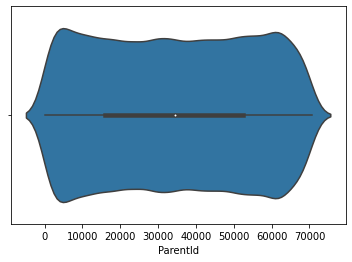

In [46]:
sns.violinplot(data=so_df[so_df['ParentId'] < 100000], x='ParentId')

In [9]:
from bs4 import BeautifulSoup

def clean_html(html_doc):
    soup = BeautifulSoup(html_doc, 'html.parser')
    return soup.get_text()

In [11]:
clean_html('<a>asdf</a><b>asdf</b>')

'asdfasdf'

In [7]:
so_df['Body'][0]

"<p>I'm new to C#, and I want to use a track-bar to change a form's opacity.</p>\n\n<p>This is my code:</p>\n\n<pre><code>decimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n</code></pre>\n\n<p>When I try to build it, I get this error:</p>\n\n<blockquote>\n  <p>Cannot implicitly convert type 'decimal' to 'double'</p>\n</blockquote>\n\n<p>I tried making <code>trans</code> a double, but then the control doesn't work. This code worked fine for me in VB.NET. </p>\n\n<p>What do I need to do differently?</p>\n"

In [6]:
preprocess_html(so_df['Body'][0])

"I'm new to C#, and I want to use a track-bar to change a form's opacity.\nThis is my code:\ndecimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n\nWhen I try to build it, I get this error:\n\nCannot implicitly convert type 'decimal' to 'double'\n\nI tried making trans a double, but then the control doesn't work. This code worked fine for me in VB.NET. \nWhat do I need to do differently?\n"

## Answers number 

In [1]:
from utils.dataset_creation import get_all_csv_files
import pandas as pd
from tqdm import tqdm

In [5]:
csv_files = get_all_csv_files('data')

parent_counts = pd.Series(dtype=int)
post_type_counts = pd.Series(dtype=int)
for file in tqdm(csv_files):
    so_data = pd.read_csv(file)
    parent_counts = parent_counts.add(so_data['ParentId'].value_counts(), fill_value=0)
    post_type_counts = post_type_counts.add(so_data['PostTypeId'].value_counts(), fill_value=0)

 92%|█████████▏| 159/172 [01:57<00:13,  1.02s/it]<ipython-input-5-248317d4dbba>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
 95%|█████████▌| 164/172 [02:02<00:08,  1.05s/it]<ipython-input-5-248317d4dbba>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
 97%|█████████▋| 166/172 [02:05<00:06,  1.07s/it]<ipython-input-5-248317d4dbba>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
100%|██████████| 172/172 [02:11<00:00,  1.31it/s]


In [8]:
len(parent_counts)

2558752

In [7]:
post_type_counts

1    2785896.0
2    5769773.0
3        167.0
4       9662.0
5       9662.0
6        119.0
7          1.0
dtype: float64

In [17]:
(parent_counts >= 4).value_counts()

False    2163093
True      395659
dtype: int64

## Dalip dataset recreation

In [46]:
import pandas as pd
import numpy as np

In [19]:
dalip_results = pd.read_csv('data/dalip_stackoverflow_results/MV_results_stack.txt')

In [66]:
dalip_post_ids = np.hstack([dalip_results['id'], dalip_results['qid'].unique()])
dalip_post_ids = pd.DataFrame({'Id': dalip_post_ids})

In [76]:
csv_files = get_all_csv_files('data/dalip_stackoverflow')
dalip_dataset = []

for file in tqdm(csv_files):
    so_data = pd.read_csv(file)
    dalip_dataset.append(so_data.merge(dalip_post_ids, on='Id'))
dalip_dataset_df = pd.concat(dalip_dataset)

 92%|█████████▏| 159/172 [01:27<00:08,  1.62it/s]<ipython-input-76-d47b64a1e4d2>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
 95%|█████████▌| 164/172 [01:30<00:04,  1.65it/s]<ipython-input-76-d47b64a1e4d2>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
 97%|█████████▋| 166/172 [01:32<00:03,  1.61it/s]<ipython-input-76-d47b64a1e4d2>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
100%|██████████| 172/172 [01:35<00:00,  1.81it/s]


In [77]:
dalip_dataset_df.to_csv('data/dalip_stackoverflow_dataset/dalip_stackoverflow_dataset.csv', index=False)